In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers, regularizers

In [ ]:
# Load IMDB dataset with only top 10,000 most frequent words
(training_data, training_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Print dataset information
print(f"Training sequences: {len(training_data)}")
print(f"Testing sequences: {len(test_data)}")
print(f"Average review length: {np.mean([len(x) for x in training_data]):.1f} words")

# Show first training example
print(f"\nFirst review (word indices): {training_data[0]}")
print(f"First review label: {training_labels[0]}")
print(f"Length of first review: {len(training_data[0])} words")

Training sequences: 25000
Testing sequences: 25000
Average review length: 238.7 words

First review (word indices): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283

In [ ]:
# Find the highest word index in the training data
# Since we set num_words=10000, the highest word index should be 9,999
max([max(sequence) for sequence in training_data])

9999

In [ ]:
# Transform integer sequences into multi-hot encoded vectors
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

# Vectorize the data
x_training = vectorize_sequences(training_data)
x_test = vectorize_sequences(test_data)
y_training = np.asarray(training_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

print(f"Training data shape: {x_training.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (25000, 10000)
Test data shape: (25000, 10000)


In [ ]:
# Create validation split for training
x_val = x_training[:10000]
partial_x_training = x_training[10000:]
y_val = y_training[:10000]
partial_y_training = y_training[10000:]

In [ ]:
# Dictionary to store results from all models
results_summary = {
    'Model': [],
    'Architecture': [],
    'Validation_Accuracy': [],
    'Test_Accuracy': [],
    'Notes': []
}

# Model 1: BASELINE - TWO HIDDEN LAYERS

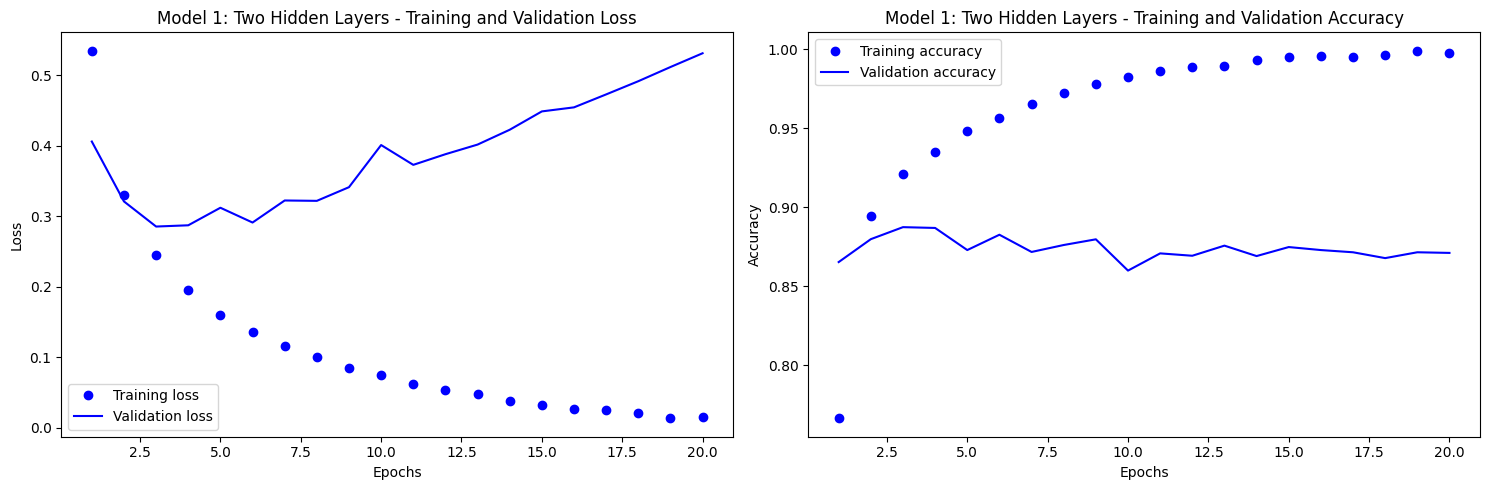


Model 1: Two Hidden Layers Results:
Validation Accuracy: 0.9543
Test Accuracy: 0.8849


In [ ]:
# Build model
model_1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_1.compile(optimizer="rmsprop",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

# Train with validation
history_model1 = model_1.fit(partial_x_training, partial_y_training,
                              epochs=20, batch_size=512,
                              validation_data=(x_val, y_val), verbose=0)


history_dict = history_model1.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title(f'Model 1: Two Hidden Layers - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title(f'Model 1: Two Hidden Layers - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

model_1_final = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_1_final.compile(optimizer="rmsprop",
                        loss="binary_crossentropy",
                        metrics=["accuracy"])

model_1_final.fit(x_training, y_training, epochs=4, batch_size=512, verbose=0)

val_results = model_1_final.evaluate(x_val, y_val, verbose=0)
test_results = model_1_final.evaluate(x_test, y_test, verbose=0)

results_summary['Model'].append('Model 1: Two Hidden Layers')
results_summary['Architecture'].append('16→16→1')
results_summary['Validation_Accuracy'].append(round(val_results[1], 4))
results_summary['Test_Accuracy'].append(round(test_results[1], 4))
results_summary['Notes'].append('ReLU, Binary Crossentropy')

print(f"\nModel 1: Two Hidden Layers Results:")
print(f"Validation Accuracy: {val_results[1]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

# Model 2: ONE HIDDEN LAYER

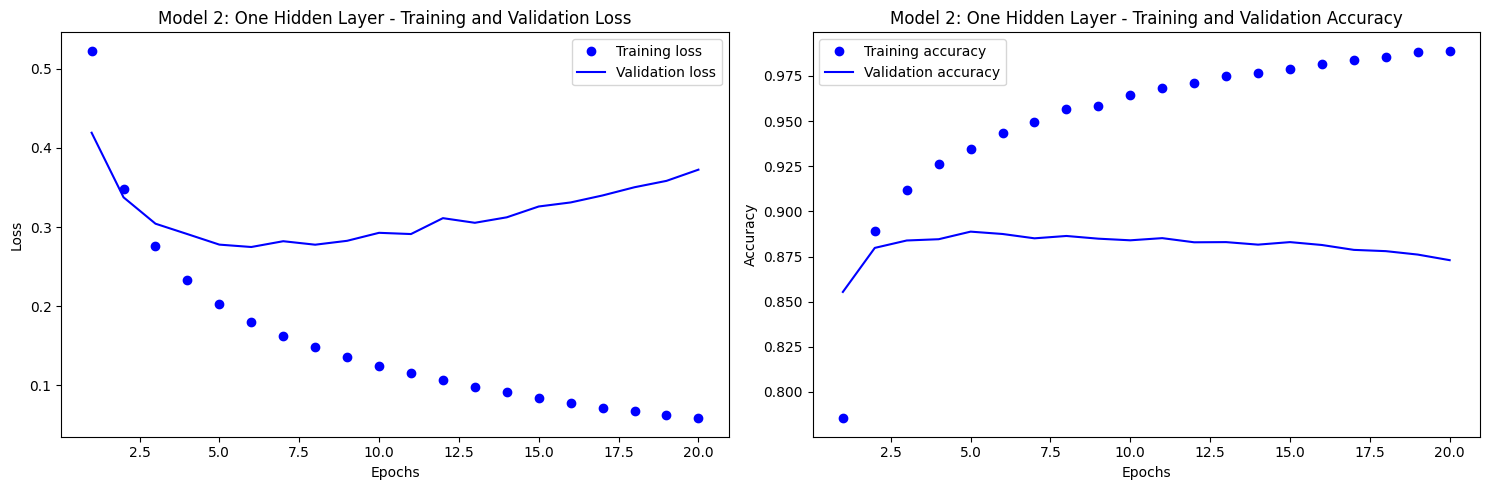


Model 2: One Hidden Layer Results:
Validation Accuracy: 0.9351
Test Accuracy: 0.8898


In [ ]:
# Build model
model_2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_2.compile(optimizer="rmsprop",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

history_model2 = model_2.fit(partial_x_training, partial_y_training,
                              epochs=20, batch_size=512,
                              validation_data=(x_val, y_val), verbose=0)

history_dict = history_model2.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title(f'Model 2: One Hidden Layer - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title(f'Model 2: One Hidden Layer - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

model_2_final = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_2_final.compile(optimizer="rmsprop",
                        loss="binary_crossentropy",
                        metrics=["accuracy"])

model_2_final.fit(x_training, y_training, epochs=4, batch_size=512, verbose=0)

val_results = model_2_final.evaluate(x_val, y_val, verbose=0)
test_results = model_2_final.evaluate(x_test, y_test, verbose=0)

results_summary['Model'].append('Model 2: One Hidden Layer')
results_summary['Architecture'].append('16→1')
results_summary['Validation_Accuracy'].append(round(val_results[1], 4))
results_summary['Test_Accuracy'].append(round(test_results[1], 4))
results_summary['Notes'].append('ReLU, Binary Crossentropy')

print(f"\nModel 2: One Hidden Layer Results:")
print(f"Validation Accuracy: {val_results[1]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

# Model 3: THREE HIDDEN LAYERS

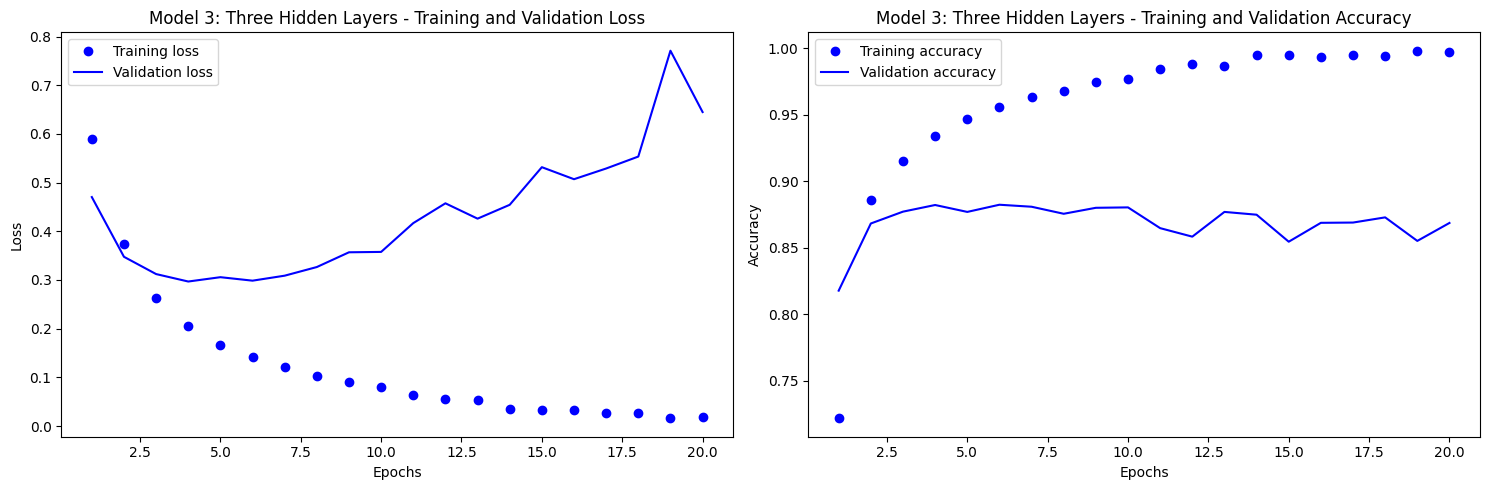


Model 3: Three Hidden Layers Results:
Validation Accuracy: 0.9574
Test Accuracy: 0.8862


In [ ]:
# Build model
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3.compile(optimizer="rmsprop",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

# Training with validation
history_model3 = model_3.fit(partial_x_training, partial_y_training,
                              epochs=20, batch_size=512,
                              validation_data=(x_val, y_val), verbose=0)

history_dict = history_model3.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title(f'Model 3: Three Hidden Layers - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title(f'Model 3: Three Hidden Layers - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

model_3_final = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3_final.compile(optimizer="rmsprop",
                        loss="binary_crossentropy",
                        metrics=["accuracy"])

model_3_final.fit(x_training, y_training, epochs=4, batch_size=512, verbose=0)

val_results = model_3_final.evaluate(x_val, y_val, verbose=0)
test_results = model_3_final.evaluate(x_test, y_test, verbose=0)

results_summary['Model'].append('Model 3: Three Hidden Layers')
results_summary['Architecture'].append('16→16→16→1')
results_summary['Validation_Accuracy'].append(round(val_results[1], 4))
results_summary['Test_Accuracy'].append(round(test_results[1], 4))
results_summary['Notes'].append('ReLU, Binary Crossentropy')

print(f"\nModel 3: Three Hidden Layers Results:")
print(f"Validation Accuracy: {val_results[1]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

# Model 4: INCREASED UNITS (32)

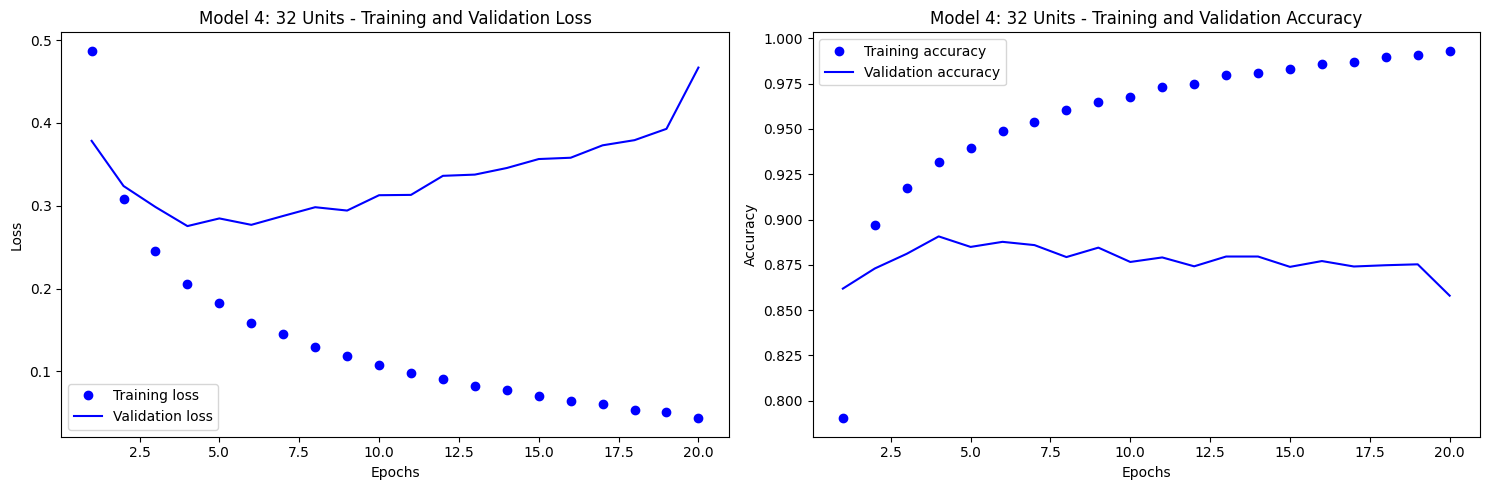


Model 4: 32 Units Results:
Validation Accuracy: 0.9425
Test Accuracy: 0.8842


In [ ]:
# Build model
model_4 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_4.compile(optimizer="rmsprop",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

# Training with validation
history_model4 = model_4.fit(partial_x_training, partial_y_training,
                              epochs=20, batch_size=512,
                              validation_data=(x_val, y_val), verbose=0)

history_dict = history_model4.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title(f'Model 4: 32 Units - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title(f'Model 4: 32 Units - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

model_4_final = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_4_final.compile(optimizer="rmsprop",
                        loss="binary_crossentropy",
                        metrics=["accuracy"])

model_4_final.fit(x_training, y_training, epochs=4, batch_size=512, verbose=0)

val_results = model_4_final.evaluate(x_val, y_val, verbose=0)
test_results = model_4_final.evaluate(x_test, y_test, verbose=0)

results_summary['Model'].append('Model 4: 32 Units')
results_summary['Architecture'].append('32→1')
results_summary['Validation_Accuracy'].append(round(val_results[1], 4))
results_summary['Test_Accuracy'].append(round(test_results[1], 4))
results_summary['Notes'].append('ReLU, Binary Crossentropy')

print(f"\nModel 4: 32 Units Results:")
print(f"Validation Accuracy: {val_results[1]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

# Model 5: INCREASED UNITS (64)

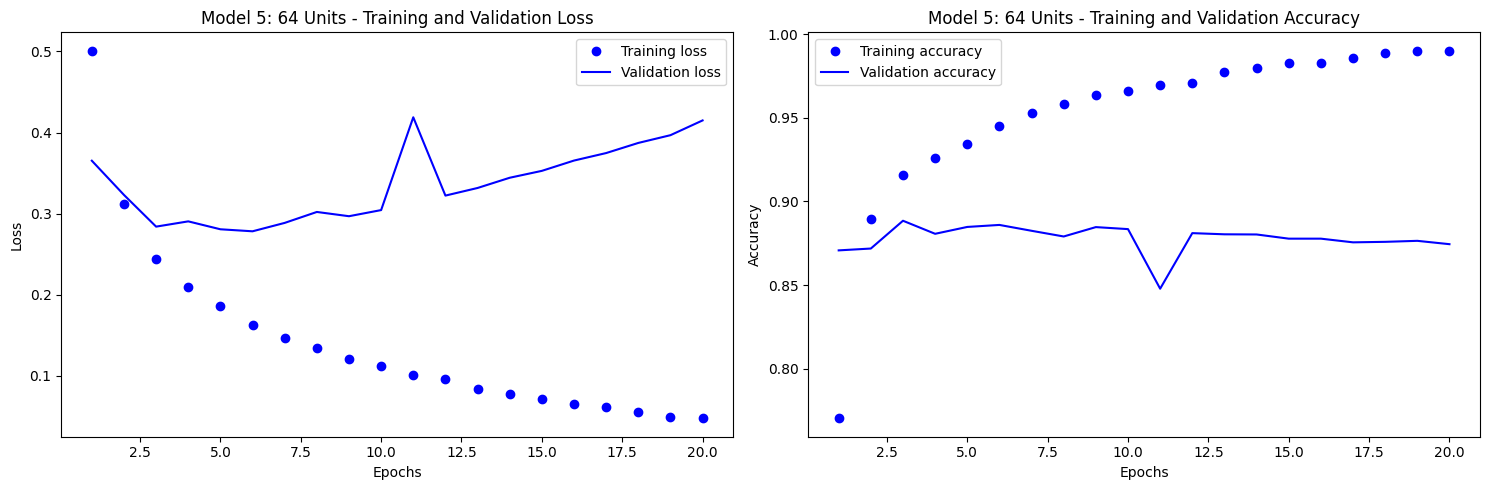


Model 5: 64 Units Results:
Validation Accuracy: 0.9457
Test Accuracy: 0.8841


In [ ]:
# Build model
model_5 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_5.compile(optimizer="rmsprop",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

# Train with validation
history_model5 = model_5.fit(partial_x_training, partial_y_training,
                              epochs=20, batch_size=512,
                              validation_data=(x_val, y_val), verbose=0)

history_dict = history_model5.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title(f'Model 5: 64 Units - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title(f'Model 5: 64 Units - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

model_5_final = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_5_final.compile(optimizer="rmsprop",
                        loss="binary_crossentropy",
                        metrics=["accuracy"])

model_5_final.fit(x_training, y_training, epochs=4, batch_size=512, verbose=0)

val_results = model_5_final.evaluate(x_val, y_val, verbose=0)
test_results = model_5_final.evaluate(x_test, y_test, verbose=0)

results_summary['Model'].append('Model 5: 64 Units')
results_summary['Architecture'].append('64→1')
results_summary['Validation_Accuracy'].append(round(val_results[1], 4))
results_summary['Test_Accuracy'].append(round(test_results[1], 4))
results_summary['Notes'].append('ReLU, Binary Crossentropy')

print(f"\nModel 5: 64 Units Results:")
print(f"Validation Accuracy: {val_results[1]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

# Model 6: MSE LOSS FUNCTION

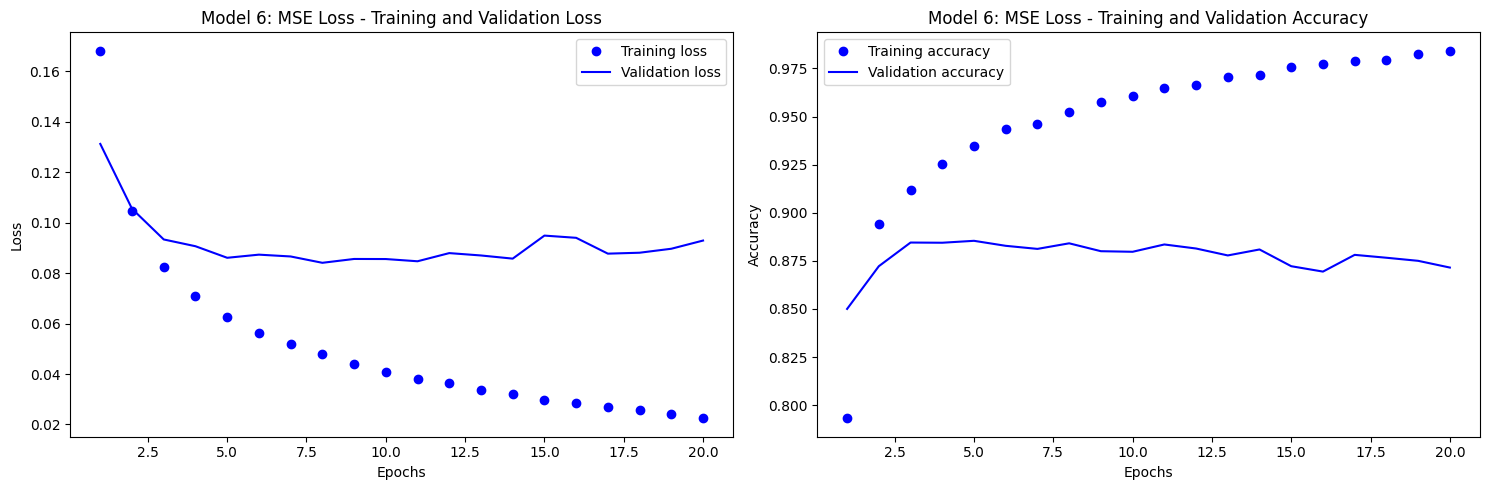


Model 6: MSE Loss Results:
Validation Accuracy: 0.9310
Test Accuracy: 0.8882


In [ ]:
# Build model
model_6 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_6.compile(optimizer="rmsprop",
                   loss="mse",
                   metrics=["accuracy"])

# Train with validation
history_model6 = model_6.fit(partial_x_training, partial_y_training,
                              epochs=20, batch_size=512,
                              validation_data=(x_val, y_val), verbose=0)

history_dict = history_model6.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title(f'Model 6: MSE Loss - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title(f'Model 6: MSE Loss - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


model_6_final = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_6_final.compile(optimizer="rmsprop",
                        loss="mse",
                        metrics=["accuracy"])

model_6_final.fit(x_training, y_training, epochs=4, batch_size=512, verbose=0)

val_results = model_6_final.evaluate(x_val, y_val, verbose=0)
test_results = model_6_final.evaluate(x_test, y_test, verbose=0)

results_summary['Model'].append('Model 6: MSE Loss')
results_summary['Architecture'].append('16→1')
results_summary['Validation_Accuracy'].append(round(val_results[1], 4))
results_summary['Test_Accuracy'].append(round(test_results[1], 4))
results_summary['Notes'].append('ReLU, MSE Loss')

print(f"\nModel 6: MSE Loss Results:")
print(f"Validation Accuracy: {val_results[1]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

# Model 7: TANH ACTIVATION

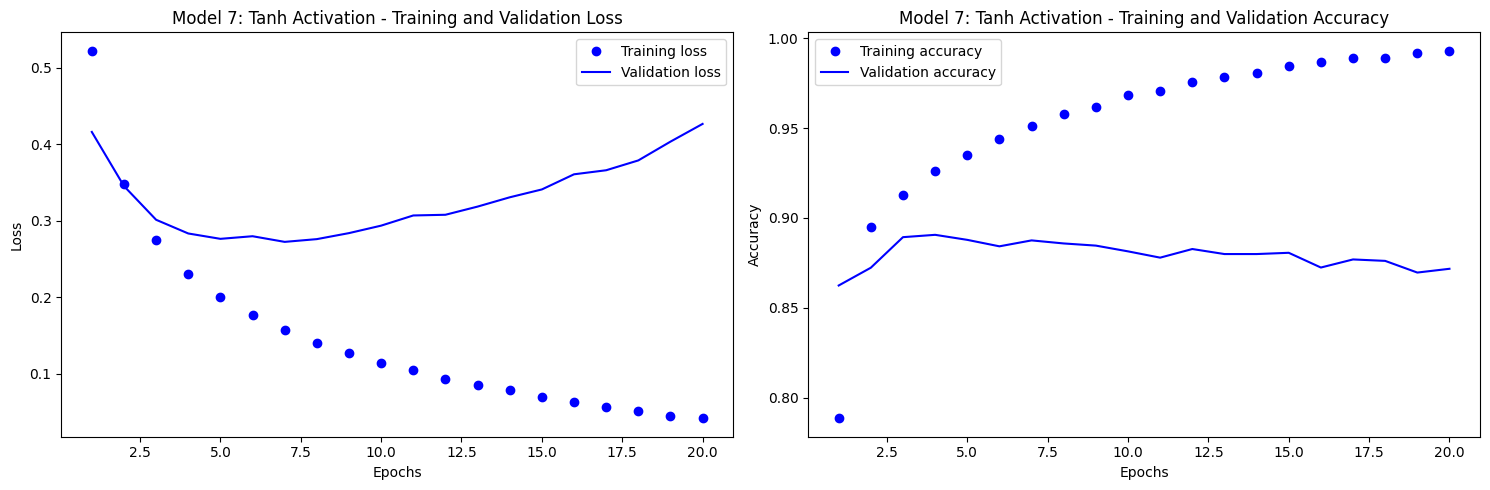


Model 7: Tanh Activation Results:
Validation Accuracy: 0.9374
Test Accuracy: 0.8819


In [ ]:
# Build model
model_7 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_7.compile(optimizer="rmsprop",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

history_model7 = model_7.fit(partial_x_training, partial_y_training,
                              epochs=20, batch_size=512,
                              validation_data=(x_val, y_val), verbose=0)

history_dict = history_model7.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title(f'Model 7: Tanh Activation - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title(f'Model 7: Tanh Activation - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


model_7_final = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model_7_final.compile(optimizer="rmsprop",
                        loss="binary_crossentropy",
                        metrics=["accuracy"])

model_7_final.fit(x_training, y_training, epochs=4, batch_size=512, verbose=0)

val_results = model_7_final.evaluate(x_val, y_val, verbose=0)
test_results = model_7_final.evaluate(x_test, y_test, verbose=0)

results_summary['Model'].append('Model 7: Tanh Activation')
results_summary['Architecture'].append('16→1')
results_summary['Validation_Accuracy'].append(round(val_results[1], 4))
results_summary['Test_Accuracy'].append(round(test_results[1], 4))
results_summary['Notes'].append('Tanh, Binary Crossentropy')

print(f"\nModel 7: Tanh Activation Results:")
print(f"Validation Accuracy: {val_results[1]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

# Model 8: L2 REGULARIZATION

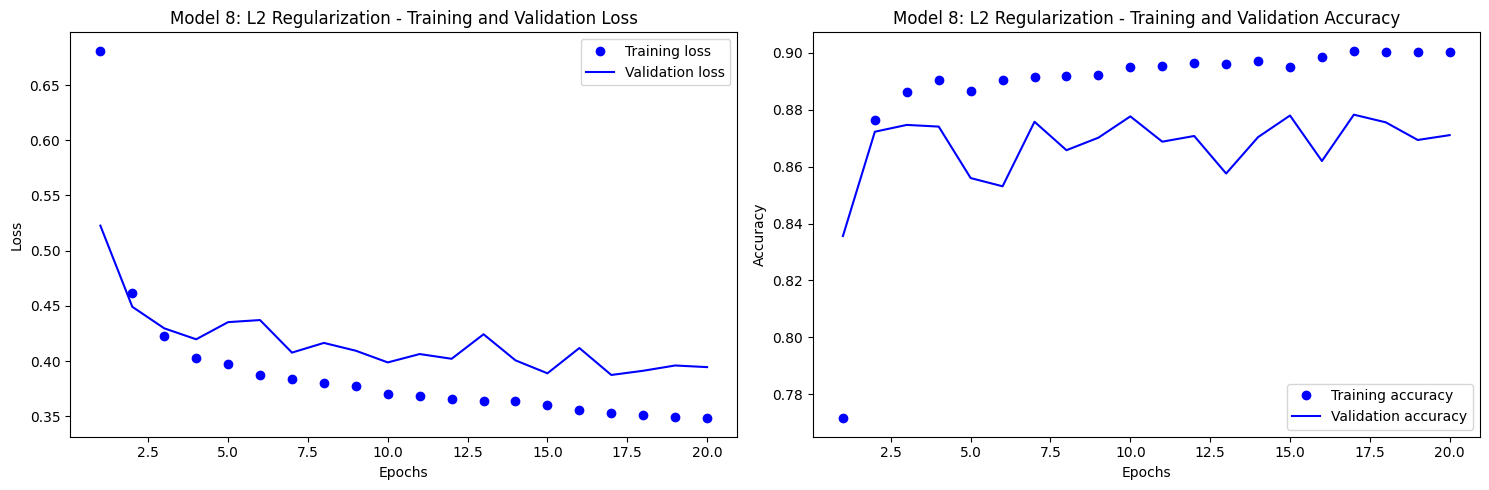


Model 8: L2 Regularization Results:
Validation Accuracy: 0.8907
Test Accuracy: 0.8718


In [ ]:
# Build model
model_8 = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation="sigmoid")
])

model_8.compile(optimizer="rmsprop",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

history_model8 = model_8.fit(partial_x_training, partial_y_training,
                              epochs=20, batch_size=512,
                              validation_data=(x_val, y_val), verbose=0)

history_dict = history_model8.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title(f'Model 8: L2 Regularization - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title(f'Model 8: L2 Regularization - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

model_8_final = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation="sigmoid")
])
model_8_final.compile(optimizer="rmsprop",
                        loss="binary_crossentropy",
                        metrics=["accuracy"])

model_8_final.fit(x_training, y_training, epochs=4, batch_size=512, verbose=0)

val_results = model_8_final.evaluate(x_val, y_val, verbose=0)
test_results = model_8_final.evaluate(x_test, y_test, verbose=0)

results_summary['Model'].append('Model 8: L2 Regularization')
results_summary['Architecture'].append('16→1')
results_summary['Validation_Accuracy'].append(round(val_results[1], 4))
results_summary['Test_Accuracy'].append(round(test_results[1], 4))
results_summary['Notes'].append('ReLU + L2(0.01), Binary Crossentropy')

print(f"\nModel 8: L2 Regularization Results:")
print(f"Validation Accuracy: {val_results[1]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

# Model 9: DROPOUT REGULARIZATION

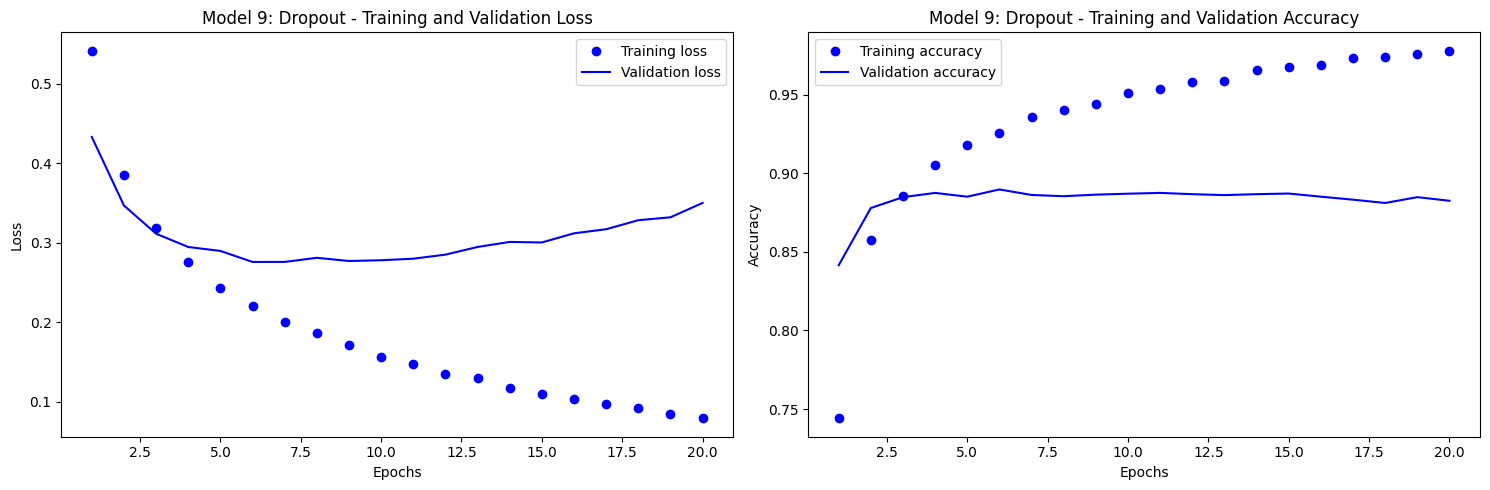


Model 9: Dropout Results:
Validation Accuracy: 0.9358
Test Accuracy: 0.8901


In [ ]:
# Build model
model_9 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model_9.compile(optimizer="rmsprop",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

history_model9 = model_9.fit(partial_x_training, partial_y_training,
                              epochs=20, batch_size=512,
                              validation_data=(x_val, y_val), verbose=0)

history_dict = history_model9.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title(f'Model 9: Dropout - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title(f'Model 9: Dropout - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

model_9_final = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_9_final.compile(optimizer="rmsprop",
                        loss="binary_crossentropy",
                        metrics=["accuracy"])

model_9_final.fit(x_training, y_training, epochs=4, batch_size=512, verbose=0)

val_results = model_9_final.evaluate(x_val, y_val, verbose=0)
test_results = model_9_final.evaluate(x_test, y_test, verbose=0)

results_summary['Model'].append('Model 9: Dropout')
results_summary['Architecture'].append('16→Dropout(0.5)→1')
results_summary['Validation_Accuracy'].append(round(val_results[1], 4))
results_summary['Test_Accuracy'].append(round(test_results[1], 4))
results_summary['Notes'].append('ReLU + Dropout, Binary Crossentropy')

print(f"\nModel 9: Dropout Results:")
print(f"Validation Accuracy: {val_results[1]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

# Model 10: COMBINED APPROACH

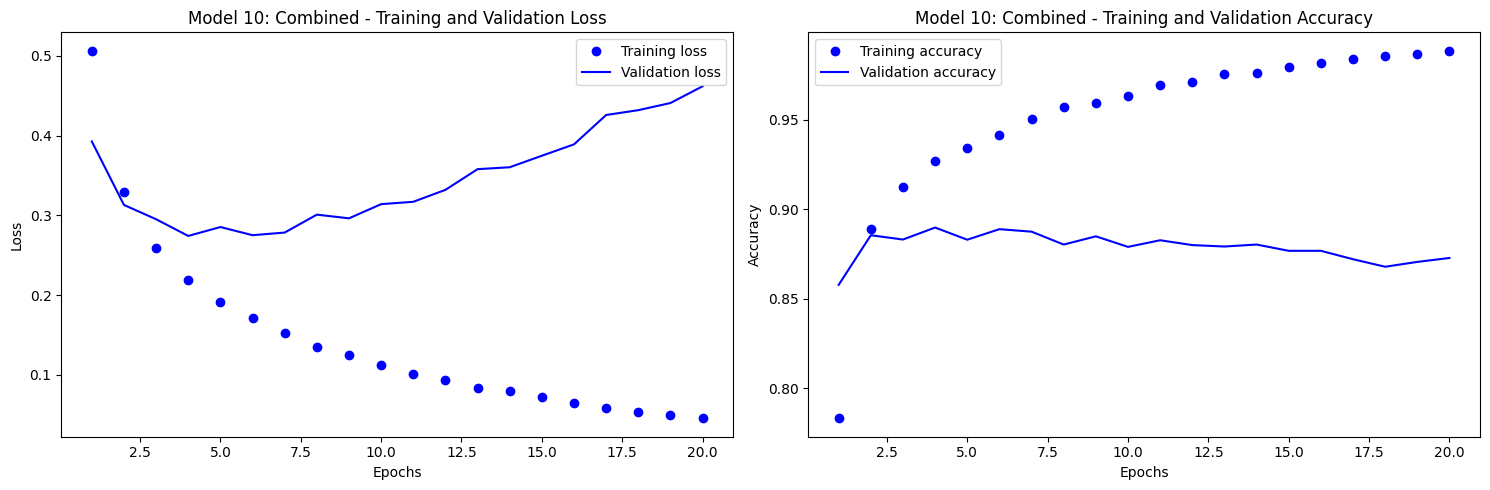


Model 10: Combined Results:
Validation Accuracy: 0.9411
Test Accuracy: 0.8876


In [ ]:
# Build model
model_10 = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model_10.compile(optimizer="rmsprop",
                    loss="binary_crossentropy",
                    metrics=["accuracy"])

history_model_10 = model_10.fit(partial_x_training, partial_y_training,
                                epochs=20, batch_size=512,
                                validation_data=(x_val, y_val), verbose=0)

history_dict = history_model_10.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title(f'Model 10: Combined - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title(f'Model 10: Combined - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


model_10_final = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_10_final.compile(optimizer="rmsprop",
                         loss="binary_crossentropy",
                         metrics=["accuracy"])

model_10_final.fit(x_training, y_training, epochs=4, batch_size=512, verbose=0)

val_results = model_10_final.evaluate(x_val, y_val, verbose=0)
test_results = model_10_final.evaluate(x_test, y_test, verbose=0)

results_summary['Model'].append('Model 10: Combined')
results_summary['Architecture'].append('32→Dropout(0.5)→1')
results_summary['Validation_Accuracy'].append(round(val_results[1], 4))
results_summary['Test_Accuracy'].append(round(test_results[1], 4))
results_summary['Notes'].append('Tanh + Dropout, Binary Crossentropy')

print(f"\nModel 10: Combined Results:")
print(f"Validation Accuracy: {val_results[1]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

# RESULTS SUMMARY AND ANALYSIS

                       Model      Architecture  Validation_Accuracy  Test_Accuracy                                Notes
  Model 1: Two Hidden Layers           16→16→1               0.9543         0.8849            ReLU, Binary Crossentropy
   Model 2: One Hidden Layer              16→1               0.9351         0.8898            ReLU, Binary Crossentropy
Model 3: Three Hidden Layers        16→16→16→1               0.9574         0.8862            ReLU, Binary Crossentropy
           Model 4: 32 Units              32→1               0.9425         0.8842            ReLU, Binary Crossentropy
           Model 5: 64 Units              64→1               0.9457         0.8841            ReLU, Binary Crossentropy
           Model 6: MSE Loss              16→1               0.9310         0.8882                       ReLU, MSE Loss
    Model 7: Tanh Activation              16→1               0.9374         0.8819            Tanh, Binary Crossentropy
  Model 8: L2 Regularization            

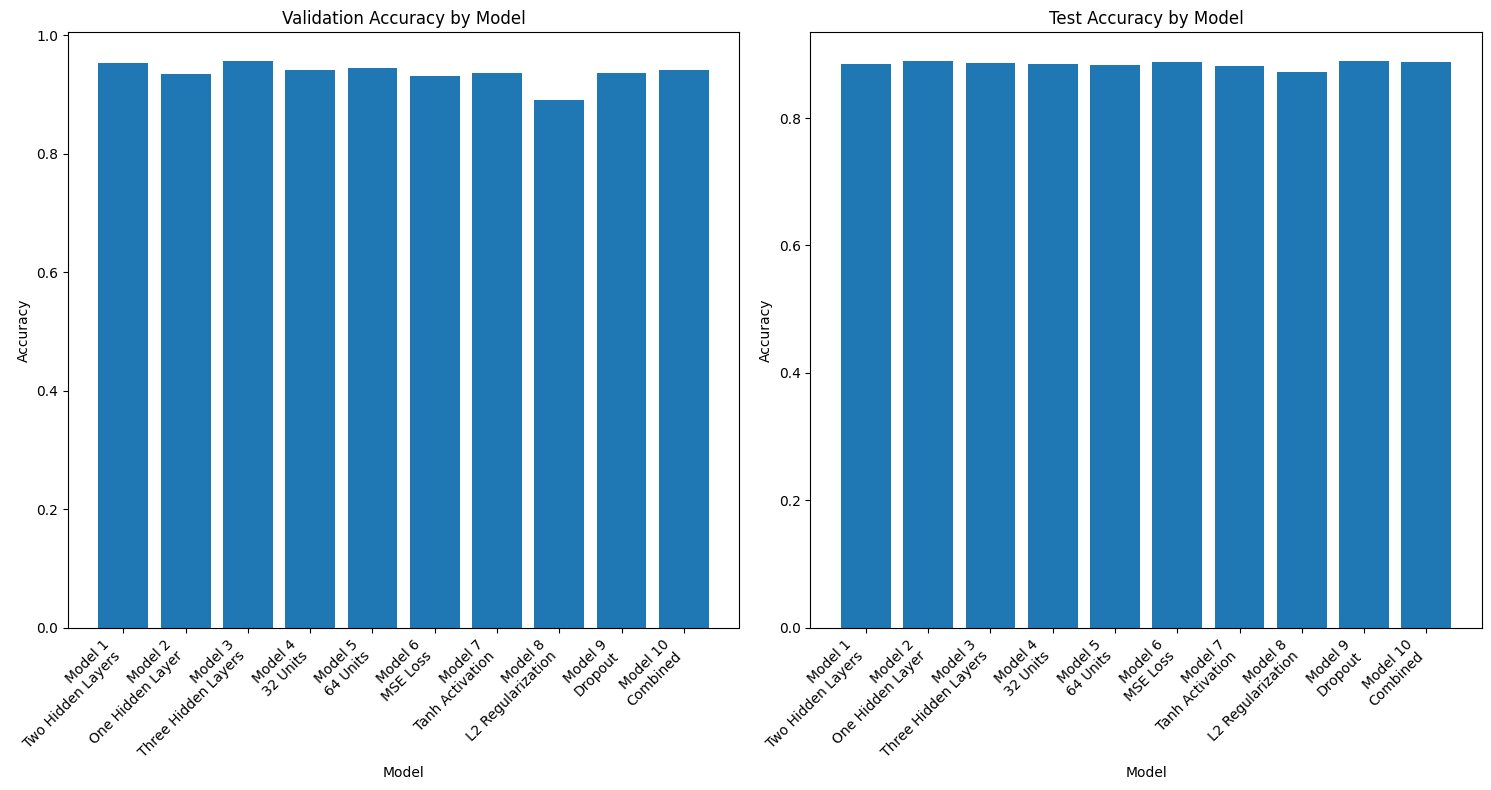


CONCLUSIONS

Based on the model results:

1. ARCHITECTURE DEPTH:
   - Two hidden layers (baseline) vs one vs three layers
   - Results show the impact of network depth on performance

2. NETWORK WIDTH:
   - Increasing units from 16 to 32 to 64
   - Demonstrates the effect of network capacity

3. LOSS FUNCTIONS:
   - Binary crossentropy vs MSE for binary classification
   - Shows importance of appropriate loss function selection

4. ACTIVATION FUNCTIONS:
   - ReLU vs Tanh activation functions
   - Compares modern vs classical activation choices

5. REGULARIZATION TECHNIQUES:
   - L2 regularization and Dropout
   - Shows techniques to prevent overfitting

The best performing model achieved:
- Validation Accuracy: 0.9574
- Test Accuracy: 0.8901

This demonstrates the importance of hyperparameter tuning and
architectural choices in neural network performance.



In [ ]:
import pandas as pd

# Create DataFrame for better visualization
results_df = pd.DataFrame(results_summary)
print(results_df.to_string(index=False))

# Find best performing models
best_val_accuracy = max(results_summary['Validation_Accuracy'])
best_test_accuracy = max(results_summary['Test_Accuracy'])

best_val_idx = results_summary['Validation_Accuracy'].index(best_val_accuracy)
best_test_idx = results_summary['Test_Accuracy'].index(best_test_accuracy)

print(f"\nBest Validation Accuracy: {best_val_accuracy:.4f}")
print(f"Model: {results_summary['Model'][best_val_idx]}")
print(f"Architecture: {results_summary['Architecture'][best_val_idx]}")

print(f"\nBest Test Accuracy: {best_test_accuracy:.4f}")
print(f"Model: {results_summary['Model'][best_test_idx]}")
print(f"Architecture: {results_summary['Architecture'][best_test_idx]}")

# Visualization of results
plt.figure(figsize=(15, 8))

models = [exp.replace('Exp ', '').replace(': ', '\n') for exp in results_summary['Model']]

plt.subplot(1, 2, 1)
plt.bar(range(len(models)), results_summary['Validation_Accuracy'])
plt.title('Validation Accuracy by Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(range(len(models)), models, rotation=45, ha='right')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.bar(range(len(models)), results_summary['Test_Accuracy'])
plt.title('Test Accuracy by Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(range(len(models)), models, rotation=45, ha='right')
plt.tight_layout()

plt.show()

# =============================================================================
# CONCLUSIONS
# =============================================================================

print("\n" + "="*60)
print("CONCLUSIONS")
print("="*60)

print("""
Based on the model results:

1. ARCHITECTURE DEPTH:
   - Two hidden layers (baseline) vs one vs three layers
   - Results show the impact of network depth on performance

2. NETWORK WIDTH:
   - Increasing units from 16 to 32 to 64
   - Demonstrates the effect of network capacity

3. LOSS FUNCTIONS:
   - Binary crossentropy vs MSE for binary classification
   - Shows importance of appropriate loss function selection

4. ACTIVATION FUNCTIONS:
   - ReLU vs Tanh activation functions
   - Compares modern vs classical activation choices

5. REGULARIZATION TECHNIQUES:
   - L2 regularization and Dropout
   - Shows techniques to prevent overfitting

The best performing model achieved:
- Validation Accuracy: {:.4f}
- Test Accuracy: {:.4f}

This demonstrates the importance of hyperparameter tuning and
architectural choices in neural network performance.
""".format(best_val_accuracy, best_test_accuracy))